In [14]:
# Note: Appears that no meaningful clustering exists

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt

scaledFeatures = pd.read_csv("../../data/sets/insurance_features_scaled.csv")
maxClusters = 9

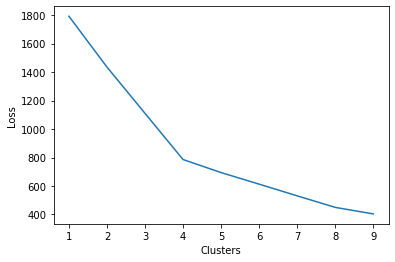

In [11]:
### Elbow method for KMeans ###

losses = []
for i in range(1, maxClusters + 1):
    km = KMeans(n_clusters = i)
    km.fit(scaledFeatures)
    losses.append(km.inertia_)

plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters')
plt.ylabel('Loss')
plt.show()

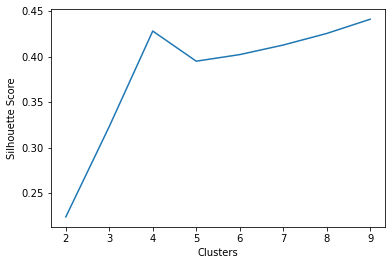

In [12]:
### Silhouette analysis for KMeans ###

scores = []
for i in range(2, maxClusters + 1):
    km = KMeans(n_clusters = i)
    km.fit(scaledFeatures)
    score = silhouette_score(scaledFeatures, km.labels_)
    scores.append(score)

plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

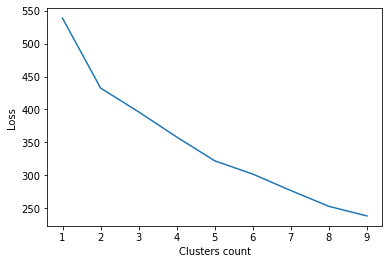

In [15]:
### Elbow method for KPrototypes ###

losses = []
for i in range(1, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    losses.append(kp.cost_)

plt.plot(range(1, maxClusters + 1), losses)
plt.xlabel('Clusters count')
plt.ylabel('Loss')
plt.show()

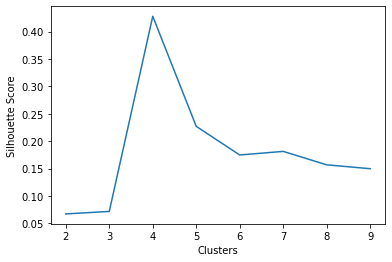

In [16]:
### Silhouette analysis for KPrototypes ###

scores = []
for i in range(2, maxClusters + 1):
    kp = KPrototypes(n_clusters = i, init = "Cao")
    kp.fit(scaledFeatures, categorical = [3, 4, 5, 6, 7, 8])
    score = silhouette_score(scaledFeatures, kp.labels_)
    scores.append(score)

plt.plot(range(2, maxClusters + 1), scores)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()